# Zastosowanie drzew decyzyjnych oraz lasów losowych przy, gdzie y reprezentowany jest przez dane typu ciągłego**


## 1. Biblioteki

In [1]:
import pandas as pd
import sklearn.tree
import numpy as np
from sklearn.tree import DecisionTreeRegressor  #ładowanie fukcji do tworzenia instacji drzew dla Y ciaglego
from sklearn.metrics import mean_absolute_error, r2_score #funkcje do badania dopasowania modelu
from sklearn.ensemble import RandomForestRegressor #ladowanie funkcji RandomForestRegressor do tworzenia instancji algorytmu
from sklearn.ensemble import GradientBoostingRegressor 
import dtreeviz.trees as dtv # importowanie dtreeviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from dtreeviz.trees import *


import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 

from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer

import graphviz

## 2. Wczytuje  i sprawdzam typ danych

In [2]:
train_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_train.csv')
test_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_test.csv')
val_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_val.csv')

train_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
test_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
val_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']

caly_df = pd.concat([train_df, test_df, val_df])
caly_df['Województwo']=caly_df['Województwo'].astype('category')
caly_df['Data urodzenia']=caly_df['Data urodzenia'].astype('category')

del caly_df["id"]
del caly_df["PF"]
del caly_df["IE"]
del caly_df["Dokł. IE"]
del caly_df['kategoria']

In [3]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 188
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Województwo     1881 non-null   category
 1   Data urodzenia  1881 non-null   category
 2   PI-PROD         1881 non-null   int64   
 3   PI-POKR         1881 non-null   int64   
 4   Prc             1881 non-null   int64   
 5   Psm             1881 non-null   int64   
 6   Pnr             1881 non-null   int64   
 7   Pw              1881 non-null   int64   
 8   PI-PLOD         1881 non-null   int64   
 9   CRj             1881 non-null   int64   
 10  CRk             1881 non-null   int64   
 11  PP              1881 non-null   int64   
 12  OMC             1881 non-null   int64   
 13  WH-KSOM         1881 non-null   int64   
 14  WH-DLUG         1881 non-null   int64   
 15  IP              1881 non-null   int64   
 16  kg ml           1881 non-null   int64   
 17  kg tł          

### 3. Usuwam mniejszości zmiennych kategorycznych 

In [4]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                4
PODKARPACKIE             1
Name: Województwo, dtype: int64

In [5]:
caly_df=caly_df[caly_df['Województwo']!='PODKARPACKIE']
caly_df=caly_df[caly_df['Województwo']!='LUBELSKIE']

In [6]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                0
PODKARPACKIE             0
Name: Województwo, dtype: int64

In [7]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       1
Name: Data urodzenia, dtype: int64

In [8]:
caly_df=caly_df[caly_df['Data urodzenia']!=2015]

In [9]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       0
Name: Data urodzenia, dtype: int64

In [10]:
caly_label=caly_df["OMC"]
del caly_df["OMC"]

### 4. Zakodowuje zmienne kategoryczne 

In [11]:
a=pd.get_dummies(caly_df['Województwo'])
b=pd.get_dummies(caly_df['Data urodzenia'])
caly_df= pd.concat([caly_df,a,b], axis=1)
del caly_df['Województwo']
del caly_df['Data urodzenia']

In [12]:
caly_df

,PI-PROD,PI-POKR,Prc,Psm,Pnr,Pw,PI-PLOD,CRj,CRk,PP,...,ŁÓDZKIE,ŚLĄSKIE,ŚWIĘTOKRZYSKIE,2015,2016,2017,2018,2019,2020,2021
0,137,127,121,113,106,128,109,107,110,101,...,0,0,0,0,0,0,0,0,1,0
1,126,123,109,113,103,128,114,114,113,94,...,0,0,0,0,0,0,1,0,0,0
2,126,120,110,107,102,124,113,112,117,94,...,0,0,0,0,0,0,0,0,1,0
3,133,111,104,110,99,114,114,113,126,89,...,0,0,0,0,0,0,0,0,1,0
4,125,115,91,95,101,124,134,129,133,102,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,134,119,112,115,106,118,102,103,108,92,...,0,0,0,0,0,0,0,0,1,0
185,132,117,103,103,107,119,93,94,102,96,...,0,0,0,0,0,0,1,0,0,0
186,120,109,106,97,96,115,120,114,134,100,...,0,0,0,0,0,0,0,1,0,0
187,113,114,97,94,103,120,114,104,115,132,...,1,0,0,0,0,0,1,0,0,0


In [13]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1875 entries, 0 to 188
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PI-PROD              1875 non-null   int64  
 1   PI-POKR              1875 non-null   int64  
 2   Prc                  1875 non-null   int64  
 3   Psm                  1875 non-null   int64  
 4   Pnr                  1875 non-null   int64  
 5   Pw                   1875 non-null   int64  
 6   PI-PLOD              1875 non-null   int64  
 7   CRj                  1875 non-null   int64  
 8   CRk                  1875 non-null   int64  
 9   PP                   1875 non-null   int64  
 10  WH-KSOM              1875 non-null   int64  
 11  WH-DLUG              1875 non-null   int64  
 12  IP                   1875 non-null   int64  
 13  kg ml                1875 non-null   int64  
 14  kg tł                1875 non-null   int64  
 15  % tł                 1875 non-null   in

### 5. Tworzę metrykę do oceny dobierania parametrów


In [14]:
mae_scorer = make_scorer(mean_absolute_error)

## 6 Modele

gradient boosting i XGBR nie wymagają standaryzacji

## 8.1 GradientBoosting - regresje

## 8.1.1 GradientBoosting - dobieram zmienne

In [15]:
estimator=GradientBoostingRegressor()
selector = RFECV(estimator, step=1, cv=2,scoring=mae_scorer)
selector2 = selector.fit(caly_df, caly_label)                   

In [16]:
kombinacje=[]
nazwy_kolumn=caly_df.columns
dictionary = dict(zip(nazwy_kolumn, selector2.ranking_))
dictionary= dict(sorted(dictionary.items(), key=lambda item: item[1]))

In [17]:
caly_df_zapas=caly_df

In [18]:
nazwy_kolumn_2=[]
for x in dictionary.keys():
    nazwy_kolumn_2.append(x)

In [19]:

    
dane_do_porownania=pd.DataFrame(columns=["Liczba zmiennych",
                                    "Błąd"]
                                )
glowne_wyniki=[]
glowne_zmienne=[]
for i in range(0,len(nazwy_kolumn_2)):
    zmienne=[]
    for q in range(0,i+1):
        zmienne.append(nazwy_kolumn_2[q])
    kombinacje.append(zmienne)
    data_frame=caly_df_zapas[zmienne]
    kfold = KFold(n_splits=5, shuffle=False)

    data_frame = np.array(data_frame)
    caly_label = np.array(caly_label)
    
    wyniki=[]
    
    for train, test in kfold.split(data_frame, caly_label):
        reg = GradientBoostingRegressor()
        reg.fit(data_frame[train], caly_label[train])
        predykcje=reg.predict(data_frame[test])
        
        dane_folda=pd.DataFrame({"pred": predykcje.ravel(),
                                    "obs": caly_label[test]
                                })
        
        dane_folda['blad']=abs(dane_folda['obs']-dane_folda['pred'])
        mae=dane_folda['blad'].sum()/len(dane_folda['blad'])
        wyniki.append(mae)
        
    wynik=sum(wyniki)/len(wyniki)
    glowne_wyniki.append(wynik)
    glowne_zmienne.append(i)
    
dane_do_porownania["Liczba zmiennych"]=glowne_zmienne
dane_do_porownania["Błąd"]=glowne_wyniki

index=list(dane_do_porownania["Błąd"]).index(min(list(dane_do_porownania["Błąd"])))

print(index,"\n",kombinacje[index])

17 
 ['PP', 'CRk', 'kg ml', 'PI-PLOD', 'IP', 'w', 'kg tł', 'CRj', 'nr', '% bi', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'WH-KSOM', 'rc', 'WH-DLUG', '% tł']


In [20]:
len(kombinacje[index])

18

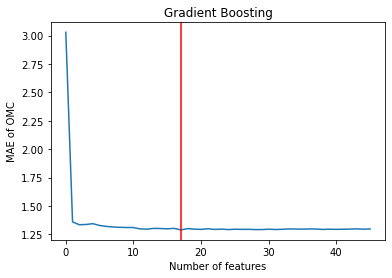

In [21]:
plt.plot(list(dane_do_porownania["Błąd"]))
plt.axvline(x=list(dane_do_porownania["Błąd"]).index(min(list(dane_do_porownania["Błąd"]))), color='r', linestyle='-')
plt.xlabel("Number of features")
plt.ylabel("MAE of OMC")
plt.title("Gradient Boosting")
plt.show()

In [22]:
dane_do_porownania.to_csv('Wyniki REFCV GradientBoosting OMC.csv',index=False)

In [38]:
kombinacje[index]

['PP',
 'CRk',
 'kg ml',
 'PI-PLOD',
 'IP',
 'w',
 'kg tł',
 'CRj',
 'nr',
 '% bi',
 'PI-POKR',
 'Prc',
 'Psm',
 'Pnr',
 'WH-KSOM',
 'rc',
 'WH-DLUG',
 '% tł']

In [39]:
zestaw_caly=caly_df_zapas
zestaw_17=caly_df_zapas[kombinacje[17]]

zestaw_caly = np.array(zestaw_caly)
zestaw_17 = np.array(zestaw_17)

caly_label = np.array(caly_label)

## 8.2 GradientBoosting - hiperparametry Wszystkie

## 8.2.1 GradientBoosting - hiperparametry Wszystkie part 1

In [40]:
param_grid = {
    'criterion':['friedman_mse'],#
    'min_samples_split':range(5,21,5), #
    'min_samples_leaf': range(5,21,5),     #
    'max_leaf_nodes':range(5,21,5), #
    'max_depth':list(range(5, 21,5)), #
    'n_estimators':[100] #
}

In [41]:
Grb_1 = GradientBoostingRegressor()
grid_search_2 = GridSearchCV(estimator = Grb_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1,scoring='neg_mean_absolute_error')
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 2 folds for each of 256 candidates, totalling 512 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'criterion': ['friedman_mse'],
                         'max_depth': [5, 10, 15, 20],
                         'max_leaf_nodes': range(5, 21, 5),
                         'min_samples_leaf': range(5, 21, 5),
                         'min_samples_split': range(5, 21, 5),
                         'n_estimators': [100]},
             scoring='neg_mean_absolute_error', verbose=1)

In [42]:
grid_search_2.best_estimator_

GradientBoostingRegressor(max_depth=20, max_leaf_nodes=20, min_samples_leaf=10,
                          min_samples_split=15)

In [43]:
grid_search_2.best_score_

-1.2233186066899198

## 8.2.2 GradientBoosting - hiperparametry Wszystkie part 2

In [49]:
param_grid = {
    'criterion':['friedman_mse'],#
    'min_samples_split':range(14,18,1), #
    'min_samples_leaf': range(19,32,4),     #
    'max_leaf_nodes':range(19,32,4), #
    'max_depth':range(20, 26,1), #
    'n_estimators':[100] #
}

In [50]:
Grb_1 = GradientBoostingRegressor()
grid_search_2 = GridSearchCV(estimator = Grb_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 2,scoring='neg_mean_absolute_error')
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 2 folds for each of 384 candidates, totalling 768 fits
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=19, min_samples_leaf=19, min_samples_split=14, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=19, min_samples_leaf=19, min_samples_split=14, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=19, min_samples_leaf=19, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=19, min_samples_leaf=19, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=19, min_samples_leaf=19, min_samples_split=16, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=19, min_samples_leaf=19, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes

[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=23, min_samples_leaf=31, min_samples_split=14, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=23, min_samples_leaf=31, min_samples_split=14, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=23, min_samples_leaf=31, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=23, min_samples_leaf=31, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=23, min_samples_leaf=31, min_samples_split=16, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=23, min_samples_leaf=31, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=23, min_samples_leaf=31, min_samples_split=17, n_estimators=10

[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=31, min_samples_leaf=27, min_samples_split=14, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=31, min_samples_leaf=27, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=31, min_samples_leaf=27, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=31, min_samples_leaf=27, min_samples_split=16, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=31, min_samples_leaf=27, min_samples_split=16, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=31, min_samples_leaf=27, min_samples_split=17, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=31, min_samples_leaf=27, min_samples_split=17, n_estimators=10

[CV] END criterion=friedman_mse, max_depth=21, max_leaf_nodes=23, min_samples_leaf=23, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=21, max_leaf_nodes=23, min_samples_leaf=23, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=21, max_leaf_nodes=23, min_samples_leaf=23, min_samples_split=16, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=21, max_leaf_nodes=23, min_samples_leaf=23, min_samples_split=16, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=21, max_leaf_nodes=23, min_samples_leaf=23, min_samples_split=17, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=21, max_leaf_nodes=23, min_samples_leaf=23, min_samples_split=17, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=21, max_leaf_nodes=23, min_samples_leaf=27, min_samples_split=14, n_estimators=10

[CV] END criterion=friedman_mse, max_depth=21, max_leaf_nodes=31, min_samples_leaf=19, min_samples_split=15, n_estimators=100; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=21, max_leaf_nodes=31, min_samples_leaf=19, min_samples_split=16, n_estimators=100; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=21, max_leaf_nodes=31, min_samples_leaf=19, min_samples_split=16, n_estimators=100; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=21, max_leaf_nodes=31, min_samples_leaf=19, min_samples_split=17, n_estimators=100; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=21, max_leaf_nodes=31, min_samples_leaf=19, min_samples_split=17, n_estimators=100; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=21, max_leaf_nodes=31, min_samples_leaf=23, min_samples_split=14, n_estimators=100; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=21, max_leaf_nodes=31, min_samples_leaf=23, min_samples_split=14, n_estimators=10

[CV] END criterion=friedman_mse, max_depth=22, max_leaf_nodes=19, min_samples_leaf=31, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=friedman_mse, max_depth=22, max_leaf_nodes=19, min_samples_leaf=31, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=friedman_mse, max_depth=22, max_leaf_nodes=19, min_samples_leaf=31, min_samples_split=17, n_estimators=100; total time=   0.5s
[CV] END criterion=friedman_mse, max_depth=22, max_leaf_nodes=19, min_samples_leaf=31, min_samples_split=17, n_estimators=100; total time=   0.5s
[CV] END criterion=friedman_mse, max_depth=22, max_leaf_nodes=23, min_samples_leaf=19, min_samples_split=14, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=22, max_leaf_nodes=23, min_samples_leaf=19, min_samples_split=14, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=22, max_leaf_nodes=23, min_samples_leaf=19, min_samples_split=15, n_estimators=10

[CV] END criterion=friedman_mse, max_depth=22, max_leaf_nodes=27, min_samples_leaf=27, min_samples_split=16, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=22, max_leaf_nodes=27, min_samples_leaf=27, min_samples_split=17, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=22, max_leaf_nodes=27, min_samples_leaf=27, min_samples_split=17, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=22, max_leaf_nodes=27, min_samples_leaf=31, min_samples_split=14, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=22, max_leaf_nodes=27, min_samples_leaf=31, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END criterion=friedman_mse, max_depth=22, max_leaf_nodes=27, min_samples_leaf=31, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=22, max_leaf_nodes=27, min_samples_leaf=31, min_samples_split=15, n_estimators=10

[CV] END criterion=friedman_mse, max_depth=23, max_leaf_nodes=19, min_samples_leaf=23, min_samples_split=17, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=23, max_leaf_nodes=19, min_samples_leaf=23, min_samples_split=17, n_estimators=100; total time=   0.5s
[CV] END criterion=friedman_mse, max_depth=23, max_leaf_nodes=19, min_samples_leaf=27, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END criterion=friedman_mse, max_depth=23, max_leaf_nodes=19, min_samples_leaf=27, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END criterion=friedman_mse, max_depth=23, max_leaf_nodes=19, min_samples_leaf=27, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=23, max_leaf_nodes=19, min_samples_leaf=27, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END criterion=friedman_mse, max_depth=23, max_leaf_nodes=19, min_samples_leaf=27, min_samples_split=16, n_estimators=10

[CV] END criterion=friedman_mse, max_depth=23, max_leaf_nodes=27, min_samples_leaf=19, min_samples_split=17, n_estimators=100; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=23, max_leaf_nodes=27, min_samples_leaf=23, min_samples_split=14, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=23, max_leaf_nodes=27, min_samples_leaf=23, min_samples_split=14, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=23, max_leaf_nodes=27, min_samples_leaf=23, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=23, max_leaf_nodes=27, min_samples_leaf=23, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=23, max_leaf_nodes=27, min_samples_leaf=23, min_samples_split=16, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=23, max_leaf_nodes=27, min_samples_leaf=23, min_samples_split=16, n_estimators=10

[CV] END criterion=friedman_mse, max_depth=24, max_leaf_nodes=19, min_samples_leaf=19, min_samples_split=14, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=24, max_leaf_nodes=19, min_samples_leaf=19, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END criterion=friedman_mse, max_depth=24, max_leaf_nodes=19, min_samples_leaf=19, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=24, max_leaf_nodes=19, min_samples_leaf=19, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=24, max_leaf_nodes=19, min_samples_leaf=19, min_samples_split=16, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=24, max_leaf_nodes=19, min_samples_leaf=19, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=friedman_mse, max_depth=24, max_leaf_nodes=19, min_samples_leaf=19, min_samples_split=17, n_estimators=10

[CV] END criterion=friedman_mse, max_depth=24, max_leaf_nodes=23, min_samples_leaf=31, min_samples_split=14, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=24, max_leaf_nodes=23, min_samples_leaf=31, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=24, max_leaf_nodes=23, min_samples_leaf=31, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END criterion=friedman_mse, max_depth=24, max_leaf_nodes=23, min_samples_leaf=31, min_samples_split=16, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=24, max_leaf_nodes=23, min_samples_leaf=31, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END criterion=friedman_mse, max_depth=24, max_leaf_nodes=23, min_samples_leaf=31, min_samples_split=17, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=24, max_leaf_nodes=23, min_samples_leaf=31, min_samples_split=17, n_estimators=10

[CV] END criterion=friedman_mse, max_depth=24, max_leaf_nodes=31, min_samples_leaf=27, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=24, max_leaf_nodes=31, min_samples_leaf=27, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=24, max_leaf_nodes=31, min_samples_leaf=27, min_samples_split=16, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=24, max_leaf_nodes=31, min_samples_leaf=27, min_samples_split=16, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=24, max_leaf_nodes=31, min_samples_leaf=27, min_samples_split=17, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=24, max_leaf_nodes=31, min_samples_leaf=27, min_samples_split=17, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=24, max_leaf_nodes=31, min_samples_leaf=31, min_samples_split=14, n_estimators=10

[CV] END criterion=friedman_mse, max_depth=25, max_leaf_nodes=23, min_samples_leaf=23, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=25, max_leaf_nodes=23, min_samples_leaf=23, min_samples_split=16, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=25, max_leaf_nodes=23, min_samples_leaf=23, min_samples_split=16, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=25, max_leaf_nodes=23, min_samples_leaf=23, min_samples_split=17, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=25, max_leaf_nodes=23, min_samples_leaf=23, min_samples_split=17, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=25, max_leaf_nodes=23, min_samples_leaf=27, min_samples_split=14, n_estimators=100; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=25, max_leaf_nodes=23, min_samples_leaf=27, min_samples_split=14, n_estimators=10

[CV] END criterion=friedman_mse, max_depth=25, max_leaf_nodes=31, min_samples_leaf=19, min_samples_split=16, n_estimators=100; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=25, max_leaf_nodes=31, min_samples_leaf=19, min_samples_split=16, n_estimators=100; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=25, max_leaf_nodes=31, min_samples_leaf=19, min_samples_split=17, n_estimators=100; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=25, max_leaf_nodes=31, min_samples_leaf=19, min_samples_split=17, n_estimators=100; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=25, max_leaf_nodes=31, min_samples_leaf=23, min_samples_split=14, n_estimators=100; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=25, max_leaf_nodes=31, min_samples_leaf=23, min_samples_split=14, n_estimators=100; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=25, max_leaf_nodes=31, min_samples_leaf=23, min_samples_split=15, n_estimators=10

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'criterion': ['friedman_mse'],
                         'max_depth': range(20, 26),
                         'max_leaf_nodes': range(19, 32, 4),
                         'min_samples_leaf': range(19, 32, 4),
                         'min_samples_split': range(14, 18),
                         'n_estimators': [100]},
             scoring='neg_mean_absolute_error', verbose=2)

In [51]:
grid_search_2.best_estimator_

GradientBoostingRegressor(max_depth=20, max_leaf_nodes=31, min_samples_leaf=19,
                          min_samples_split=15)

In [52]:
grid_search_2.best_score_

-1.2153044473842385

### 8.2.3 GradientBoosting - hiperparametry Wszystkie part 3

In [70]:
param_grid = {
    'criterion':['friedman_mse'],#
    'min_samples_split':[15], #19
    'min_samples_leaf':[19], #21
    'max_leaf_nodes':[31], #33
    'max_depth':[20], #23
    'n_estimators':[100,1000] #
}

In [71]:
Grb_1 = GradientBoostingRegressor()
grid_search_3 = GridSearchCV(estimator = Grb_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 2,scoring='neg_mean_absolute_error')
grid_search_3.fit(zestaw_caly, np.ravel(caly_label))

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=31, min_samples_leaf=19, min_samples_split=15, n_estimators=100; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=31, min_samples_leaf=19, min_samples_split=15, n_estimators=100; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=31, min_samples_leaf=19, min_samples_split=15, n_estimators=1000; total time=  10.6s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=31, min_samples_leaf=19, min_samples_split=15, n_estimators=1000; total time=  10.5s


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'criterion': ['friedman_mse'], 'max_depth': [20],
                         'max_leaf_nodes': [31], 'min_samples_leaf': [19],
                         'min_samples_split': [15],
                         'n_estimators': [100, 1000]},
             scoring='neg_mean_absolute_error', verbose=2)

In [72]:
grid_search_3.best_estimator_

GradientBoostingRegressor(max_depth=20, max_leaf_nodes=31, min_samples_leaf=19,
                          min_samples_split=15, n_estimators=1000)

In [73]:
grid_search_3.best_score_

-1.143004971578165

## 8.3 GradientBoosting - hiperparametry zmienne 17

### 8.3.1 GradientBoosting - hiperparametry zmienne 17 part1

In [44]:
param_grid = {
    'criterion':['friedman_mse'],#
    'min_samples_split':range(19,27,2), #
    'min_samples_leaf': range(19,27,2),     #
    'max_leaf_nodes':range(27,36,2), #
    'max_depth':range(19, 26,2), #
    'n_estimators':[100] #
}

In [46]:
Grb_1 = GradientBoostingRegressor()
grid_search_2 = GridSearchCV(estimator = Grb_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1,scoring='neg_mean_absolute_error')
grid_search_2.fit(zestaw_17, np.ravel(caly_label))

Fitting 2 folds for each of 320 candidates, totalling 640 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'criterion': ['friedman_mse'],
                         'max_depth': range(19, 26, 2),
                         'max_leaf_nodes': range(27, 36, 2),
                         'min_samples_leaf': range(19, 27, 2),
                         'min_samples_split': range(19, 27, 2),
                         'n_estimators': [100]},
             scoring='neg_mean_absolute_error', verbose=1)

In [47]:
grid_search_2.best_estimator_

GradientBoostingRegressor(max_depth=23, max_leaf_nodes=33, min_samples_leaf=21,
                          min_samples_split=19)

In [48]:
grid_search_2.best_score_

-1.2107272712375114

### 8.3.2 GradientBoosting - hiperparametry zmienne 17 part2

In [59]:
param_grid = {
    'criterion':['friedman_mse'],#
    'min_samples_split':range(17, 21,1), #19
    'min_samples_leaf':range(19, 23,1), #21
    'max_leaf_nodes':range(30,36,1), #33
    'max_depth':range(20, 23,1), #23
    'n_estimators':[100] #
}

In [60]:
Grb_1 = GradientBoostingRegressor()
grid_search_2 = GridSearchCV(estimator = Grb_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1,scoring='neg_mean_absolute_error')
grid_search_2.fit(zestaw_17, np.ravel(caly_label))

Fitting 2 folds for each of 288 candidates, totalling 576 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'criterion': ['friedman_mse'],
                         'max_depth': range(20, 23),
                         'max_leaf_nodes': range(30, 36),
                         'min_samples_leaf': range(19, 23),
                         'min_samples_split': range(17, 21),
                         'n_estimators': [100]},
             scoring='neg_mean_absolute_error', verbose=1)

In [61]:
grid_search_2.best_estimator_

GradientBoostingRegressor(max_depth=20, max_leaf_nodes=32, min_samples_leaf=19,
                          min_samples_split=20)

In [62]:
grid_search_2.best_score_

-1.2083610280383281

### 8.3.3 GradientBoosting - hiperparametry zmienne 17 part 3

In [65]:
param_grid = {
    'criterion':['friedman_mse'],#
    'min_samples_split':[29], #19
    'min_samples_leaf':[19], #21
    'max_leaf_nodes':[32], #33
    'max_depth':[20], #23
    'n_estimators':[100,1000] #
}

In [67]:
Grb_1 = GradientBoostingRegressor()
grid_search_3 = GridSearchCV(estimator = Grb_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose =2,scoring='neg_mean_absolute_error')
grid_search_3.fit(zestaw_17, np.ravel(caly_label))

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=32, min_samples_leaf=19, min_samples_split=29, n_estimators=100; total time=   0.5s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=32, min_samples_leaf=19, min_samples_split=29, n_estimators=100; total time=   0.5s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=32, min_samples_leaf=19, min_samples_split=29, n_estimators=1000; total time=   7.5s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=32, min_samples_leaf=19, min_samples_split=29, n_estimators=1000; total time=   7.6s


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'criterion': ['friedman_mse'], 'max_depth': [20],
                         'max_leaf_nodes': [32], 'min_samples_leaf': [19],
                         'min_samples_split': [29],
                         'n_estimators': [100, 1000]},
             scoring='neg_mean_absolute_error', verbose=2)

In [68]:
grid_search_3.best_estimator_

GradientBoostingRegressor(max_depth=20, max_leaf_nodes=32, min_samples_leaf=19,
                          min_samples_split=29, n_estimators=1000)

In [69]:
grid_search_3.best_score_

-1.1344111507906218

In [ ]:
# zrobic cross-validacje

## 8.4 Cross validacja k=5

### 8.4.1 Wszystkie

In [74]:
kfold = KFold(n_splits=5, shuffle=False)
dane_do_zapisu_1=pd.DataFrame()
licznik=1
wart_1=[]

for train, test in kfold.split(zestaw_caly, caly_label):
    GB_1 = GradientBoostingRegressor(max_depth=20, max_leaf_nodes=31, min_samples_leaf=19,
                          min_samples_split=15, n_estimators=1000)
    
    GB_1.fit(zestaw_caly[train], caly_label[train])
    predykcje=GB_1.predict(zestaw_caly[test])
    dane_folda_1=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_1=pd.concat([dane_do_zapisu_1,dane_folda_1])
    sredni_blad=mean_absolute_error(caly_label[test],predykcje)
    wart_1.append(sredni_blad)
    licznik+=1

In [75]:
wart_1

[0.8834543669616371,
 0.8628622427505104,
 0.8483504863330908,
 0.8511577908990812,
 0.7715472117804612]

In [76]:
sum(wart_1)/len(wart_1)

0.8434744197449561

### 8.4.2 zestaw 17

In [78]:
kfold = KFold(n_splits=5, shuffle=False)
dane_do_zapisu_2=pd.DataFrame()
licznik=1
wart_2=[]

for train, test in kfold.split(zestaw_17, caly_label):
    GB_2 = GradientBoostingRegressor(max_depth=20, max_leaf_nodes=32, min_samples_leaf=19,
                          min_samples_split=29, n_estimators=1000)
    
    GB_2.fit(zestaw_17[train], caly_label[train])
    predykcje=GB_2.predict(zestaw_17[test])
    dane_folda_2=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_2=pd.concat([dane_do_zapisu_2,dane_folda_2])
    sredni_blad=mean_absolute_error(caly_label[test],predykcje)
    wart_2.append(sredni_blad)
    licznik+=1

In [79]:
wart_2

[0.8627852655605773,
 0.8862948390897877,
 0.8593840346182198,
 0.8564910294381828,
 0.7892991781459535]

In [80]:
sum(wart_2)/len(wart_2)

0.8508508693705442

### 8.5 Zapisuje predykcje Zestaw 22

In [81]:
dane_do_zapisu_1.to_csv("D:/STUDIA/ROK_II/Projekt/Predykcje_i błędy/Okres Między Ciążowy/OMC_GradientBoostingRegresor_FS.csv")